#### Necessary Imports

In [ ]:
import numpy as np
import pandas as pd
import io
import json
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from plotnine import *
import cufflinks as cf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Import CSV files

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving table1.csv to table1.csv


#### Read the Uploaded Table into a Panda Dadatframe named _df_

In [ ]:
val = input("Enter Name of the csv file: ") 
df = pd.read_csv(io.BytesIO(uploaded[val+'.csv']))
# df.head()

Enter Name of the csv file: table1


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (25,26,31) have mixed types.Specify dtype option on import or set low_memory=False.



#### Function to create a subset from the dataframe _df_ with only _Label, Motif,_ and _Decorative Techniques_
(Helpfull to create and analyze the co-occurence pattern)

In [ ]:
def get_subset_for_motif_vs_decTech(df=df):
    df2 = df[["label", "Motif", "Decorative_Technique"]] # Raw subset

    df2["Motif"].fillna(0, inplace = True)
    df2["Decorative_Technique"].fillna(0, inplace = True)

    # df2.head()
    # df2["Motif"][2]
    # df2.shape
    # lst = json.loads(df2["Motif"][0])
    # lst[0]

    df3 = df2.copy()

    for i, row in df3.iterrows():
        if type(row["Motif"]) is str:
            lst = json.loads(row["Motif"])
            df3.loc[i] = [row["label"], lst[0], row["Decorative_Technique"]]
            if len(lst) > 1:
                for j in range(1,len(lst)):
                    data = [{'label': row["label"], 'Motif': lst[j], 'Decorative_Technique': row["Decorative_Technique"]}]
                    df3 = df3.append(data, ignore_index = True, sort = False)

    for i, row in df3.iterrows():
        if type(row["Decorative_Technique"]) is str:
            lst = json.loads(row["Decorative_Technique"])
            df3.loc[i] = [row["label"], row["Motif"], lst[0]]
            if len(lst) > 1:
                for j in range(1,len(lst)):
                    data = [{'label': row["label"], 'Motif': row["Motif"], 'Decorative_Technique': lst[j] }]
                    df3 = df3.append(data, ignore_index = True, sort = False)

    df3 = df3.sort_values(by=['Motif', 'Decorative_Technique'])
    # df3 # Polished Subset
    # val = input("Enter Name of the csv file: ") 
    df3.to_csv("DF3.csv", encoding='utf-8', index=False)
    df2.to_csv("DF2.csv", encoding='utf-8', index=False) # Save the dataframe if you want
    del df2
    return df3

#### Function to create a subset from the dataframe _df_ with only _Label and Motif_
(Helpfull to create and analyze the co-occurence pattern)

In [62]:
def get_subset_for_motif_vs_motif(df=df):
    df2 = df[["label", "Motif"]] # Raw subset
    df2["Motif"].fillna(0, inplace = True)
    df3 = df2.copy()

    for i, row in df3.iterrows():
        if type(row["Motif"]) is str:
            lst = json.loads(row["Motif"])
            df3.loc[i] = [row["label"], lst[0]]
            if len(lst) > 1:
                for j in range(1,len(lst)):
                    data = [{'label': row["label"], 'Motif': lst[j]}]
                    df3 = df3.append(data, ignore_index = True, sort = False)

    df3 = df3.sort_values(by=['label'])

    # df3 # Polished Subset
    # val = input("Enter Name of the csv file: ") 
    # df3.to_csv(val+".csv", encoding='utf-8', index=False)
    # df2.to_csv(val+".csv", encoding='utf-8', index=False) # Save the dataframe if you want
    del df2
    return df3

#### Function to create a subset from the dataframe _df_ with only _Label and Decorative Techniques_
(Helpfull to create and analyze the co-occurence pattern)

In [90]:
def get_subset_for_decTech_vs_decTech(df=df):
    df2 = df[["label", "Decorative_Technique"]] # Raw subset
    df2["Decorative_Technique"].fillna(0, inplace = True)
    df3 = df2.copy()

    for i, row in df3.iterrows():
        if type(row["Decorative_Technique"]) is str:
            lst = json.loads(row["Decorative_Technique"])
            df3.loc[i] = [row["label"], lst[0]]
            if len(lst) > 1:
                for j in range(1,len(lst)):
                    data = [{'label': row["label"], 'Decorative_Technique': lst[j]}]
                    df3 = df3.append(data, ignore_index = True, sort = False)

    df3 = df3.sort_values(by=['label'])

    # df3 # Polished Subset
    # val = input("Enter Name of the csv file: ") 
    # df3.to_csv(val+".csv", encoding='utf-8', index=False)
    # df2.to_csv(val+".csv", encoding='utf-8', index=False) # Save the dataframe if you want
    del df2
    return df3

#### Function calculating Count using _motif_ and _decorative\_technique_ instances

In [ ]:
# df3 = get_subset_for_motif_vs_decTech()
def get_co_occurence_motif_v_decTech(motif, dec_tech, df=df3):
    return df[(df['Motif'] == motif ) & (df['Decorative_Technique'] == dec_tech)].label.count()

#### Function calculating Count using first and second _motif_ instances

In [88]:
# df3 = get_subset_for_motif_vs_motif()
def get_co_occurence_motif_v_motif(motif1, motif2, df=df3):
    # lst1 = df3[df3['Motif'] == 'Circles']['label'].tolist()
    lst1 = df3[df3['Motif'] == motif1]['label'].tolist()
    lst2 = df3[df3['Motif'] == motif2]['label'].tolist()
    return len(set(lst1) & set(lst2))

#### Function calculating Count using first and second _decorative-techniques_ instances

In [89]:
# df3 = get_subset_for_decTech_vs_decTech()
def get_co_occurence_decTech_v_decTech(decTech1, decTech2, df=df3):
    lst1 = df3[df3['Decorative_Technique'] == decTech1]['label'].tolist()
    lst2 = df3[df3['Decorative_Technique'] == decTech2]['label'].tolist()
    return len(set(lst1) & set(lst2))

#### Function to create dataframe for the co-occurence plot (motif vs decorative techniques)

In [ ]:
def get_df_motif_vs_decTech():
    df3 = get_subset_for_motif_vs_decTech()
    motifs = df3.Motif.unique()
    dec_techs = df3.Decorative_Technique.unique()
    # print(type(motifs))
    # print(type(dec_techs))

    # df4 = pd.DataFrame(index = motifs.tolist(), columns = dec_techs.tolist())
    df4 = pd.DataFrame(columns = ['motifs','dec_techs','weights'])
    # df4['Applique']['Animal']
    for i in motifs:
        for j in dec_techs:
            weight = get_co_occurence_motif_v_decTech(i,j)
            mot = i if i != 0 else 'No Motif'
            dt = j if j !=0 else 'No DecTech'
            if i!=0 and j!=0:
                data = [{'motifs': mot, 'dec_techs': dt, 'weights': weight }]
                df4 = df4.append(data, ignore_index = True, sort = False)
    # val = input("Enter Name of the csv file: ") 
    df4.to_csv("DF4.csv", encoding='utf-8', index=False) # Save the dataframe if you want
    return df4

In [ ]:
df4 = get_df_motif_vs_decTech()

In [ ]:
df4_matrix = df4.pivot('motifs', 'dec_techs', 'weights')
df5 = df4_matrix.astype(int)
df4["motifs"] = pd.Categorical(df4["motifs"], df4.motifs.unique())
df4["dec_techs"] = pd.Categorical(df4["dec_techs"], df4.dec_techs.unique())
df4["weights"] = df4["weights"].apply(pd.to_numeric)
# df5.dtypes
df4.dtypes

motifs       category
dec_techs    category
weights         int64
dtype: object

#### Function to create dataframe for the co-occurence plot (motif vs motif)

In [73]:
def get_df_motif_vs_motif():
    df3 = get_subset_for_motif_vs_motif()
    motifs1 = df3.Motif.unique()
    motifs2 = df3.Motif.unique()

    df4 = pd.DataFrame(columns = ['motifs1','motifs2','weights'])
    for i in motifs1:
        for j in motifs2:
            weight = get_co_occurence_motif_v_motif(i,j)
            mot1 = i if i != 0 else 'No Motif1'
            mot2 = j if j !=0 else 'No Motif2'
            if i!=0 and j!=0:
                data = [{'motifs1': mot1, 'motifs2': mot2, 'weights': weight }]
                df4 = df4.append(data, ignore_index = True, sort = False)
    # val = input("Enter Name of the csv file: ") 
    df4.to_csv("DF4(MotifVsMotif).csv", encoding='utf-8', index=False) # Save the dataframe if you want
    return df4

In [74]:
df4 = get_df_motif_vs_motif()

In [75]:
df4_matrix = df4.pivot('motifs1', 'motifs2', 'weights')
df5 = df4_matrix.astype(int)
df4["motifs1"] = pd.Categorical(df4["motifs1"], df4.motifs1.unique())
df4["motifs2"] = pd.Categorical(df4["motifs2"], df4.motifs2.unique())
df4["weights"] = df4["weights"].apply(pd.to_numeric)
# df5.dtypes
df4.dtypes

motifs1    category
motifs2    category
weights       int64
dtype: object

#### Function to create dataframe for the co-occurence plot (dec_techs vs dec_techs)

In [91]:
def get_df_decTech_vs_decTech():
    df3 = get_subset_for_decTech_vs_decTech()
    decTechs1 = df3.Decorative_Technique.unique()
    decTechs2 = df3.Decorative_Technique.unique()

    df4 = pd.DataFrame(columns = ['decTechs1','decTechs2','weights'])
    for i in decTechs1:
        for j in decTechs2:
            weight = get_co_occurence_decTech_v_decTech(i,j)
            dt1 = i if i != 0 else 'No decTech1'
            dt2 = j if j !=0 else 'No decTech2'
            if i!=0 and j!=0:
                data = [{'decTechs1': dt1, 'decTechs2': dt2, 'weights': weight }]
                df4 = df4.append(data, ignore_index = True, sort = False)
    # val = input("Enter Name of the csv file: ") 
    df4.to_csv("DF4(DecTechsVsDecTechs1).csv", encoding='utf-8', index=False) # Save the dataframe if you want
    return df4

In [92]:
df4 = get_df_decTech_vs_decTech()

In [93]:
df4_matrix = df4.pivot('decTechs1', 'decTechs2', 'weights')
df5 = df4_matrix.astype(int)
df4["decTechs1"] = pd.Categorical(df4["decTechs1"], df4.decTechs1.unique())
df4["decTechs2"] = pd.Categorical(df4["decTechs2"], df4.decTechs2.unique())
df4["weights"] = df4["weights"].apply(pd.to_numeric)
# df5.dtypes
df4.dtypes

decTechs1    category
decTechs2    category
weights         int64
dtype: object

#### Co-occurence Matrix Plot 1  (motif vs decorative techniques)

Text(0, 0.5, 'Motifs')

<Figure size 432x288 with 0 Axes>

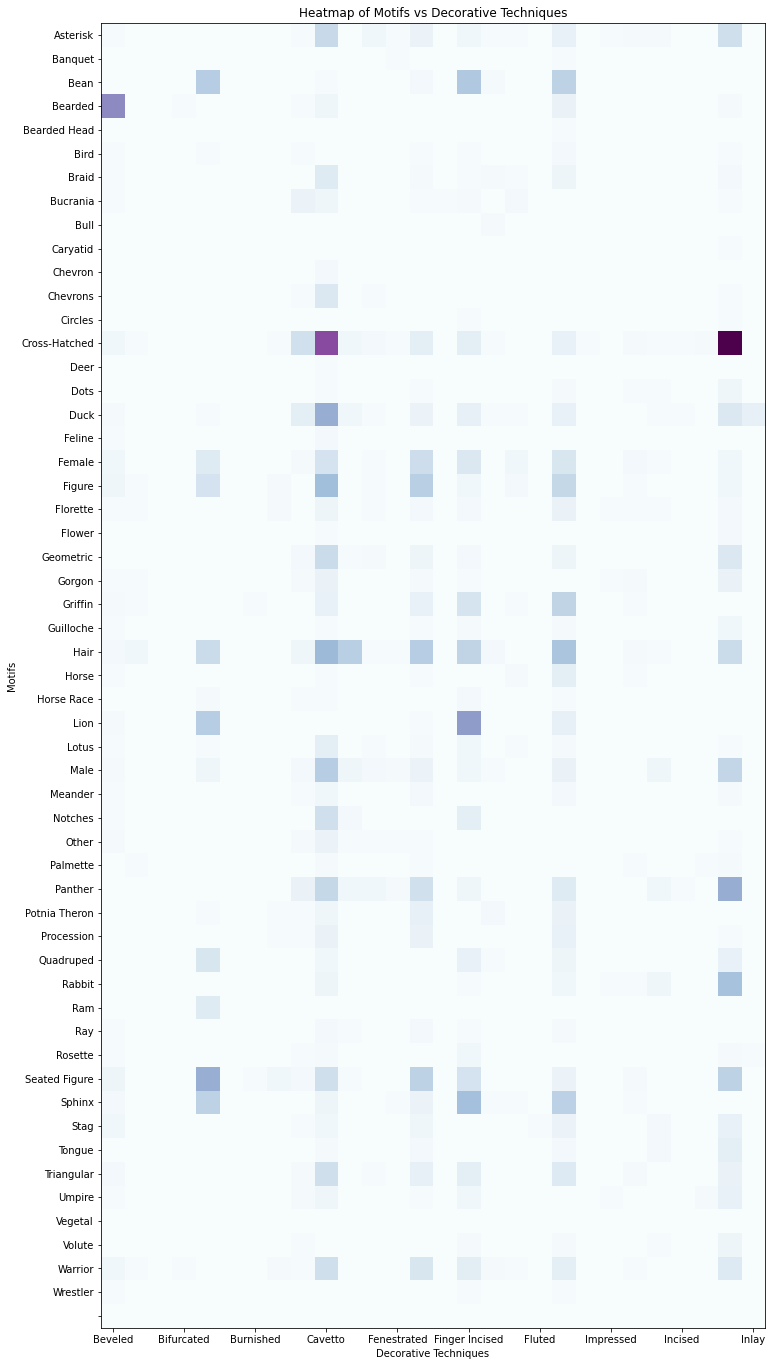

In [ ]:
fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(12,24))
heatplot = ax.imshow(df5, cmap='BuPu')
ax.set_xticklabels(df5.columns)
ax.set_yticklabels(df5.index)

tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing+2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_title("Heatmap of Motifs vs Decorative Techniques")
ax.set_xlabel('Decorative Techniques')
ax.set_ylabel('Motifs')

#### Co-occurence Matrix Plot 1  (motif vs motif)

Text(0, 0.5, 'Motifs')

<Figure size 432x288 with 0 Axes>

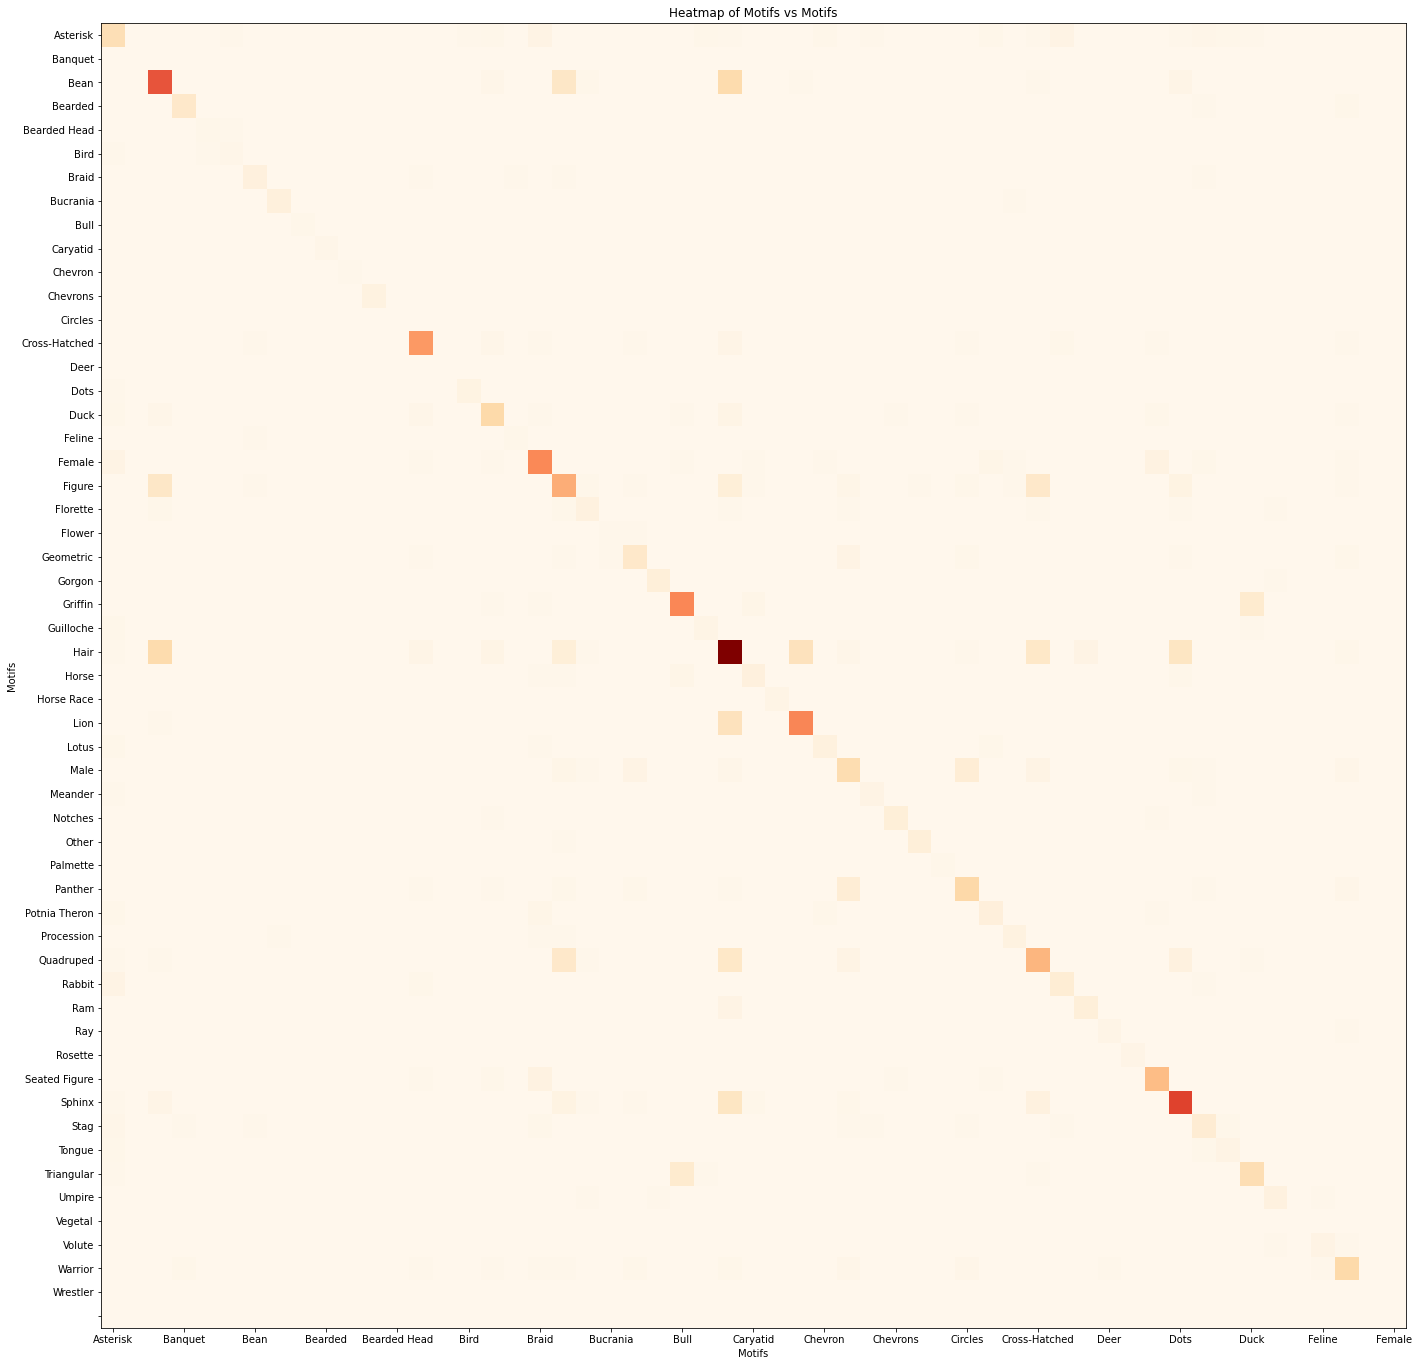

In [85]:
fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(24,24))
heatplot = ax.imshow(df5, cmap='OrRd')
ax.set_xticklabels(df5.columns)
ax.set_yticklabels(df5.index)

tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing+2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_title("Heatmap of Motifs vs Motifs")
ax.set_xlabel('Motifs')
ax.set_ylabel('Motifs')

#### Co-occurence Matrix Plot 1  (dec_techs vs dec_techs)

Text(0, 0.5, 'Decorative Techniques')

<Figure size 432x288 with 0 Axes>

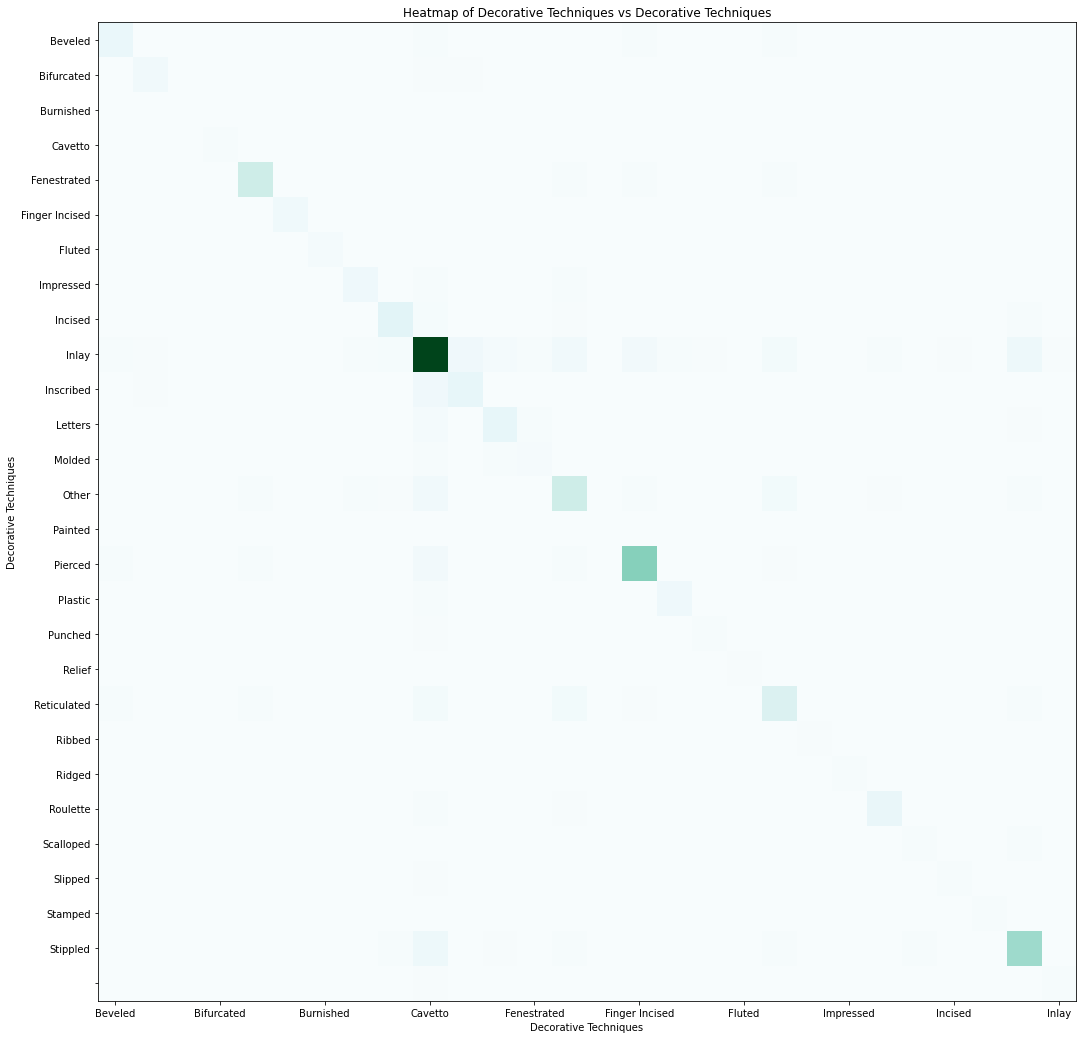

In [95]:
fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(18,18))
heatplot = ax.imshow(df5, cmap='BuGn')
ax.set_xticklabels(df5.columns)
ax.set_yticklabels(df5.index)

tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing+2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_title("Heatmap of Decorative Techniques vs Decorative Techniques")
ax.set_xlabel('Decorative Techniques')
ax.set_ylabel('Decorative Techniques')

#### Co-occurence Matrix Plot 2 (motif vs decorative techniques)

Text(0.5, 1.0, 'Heatmap of Motifs vs Decorative Techniques')

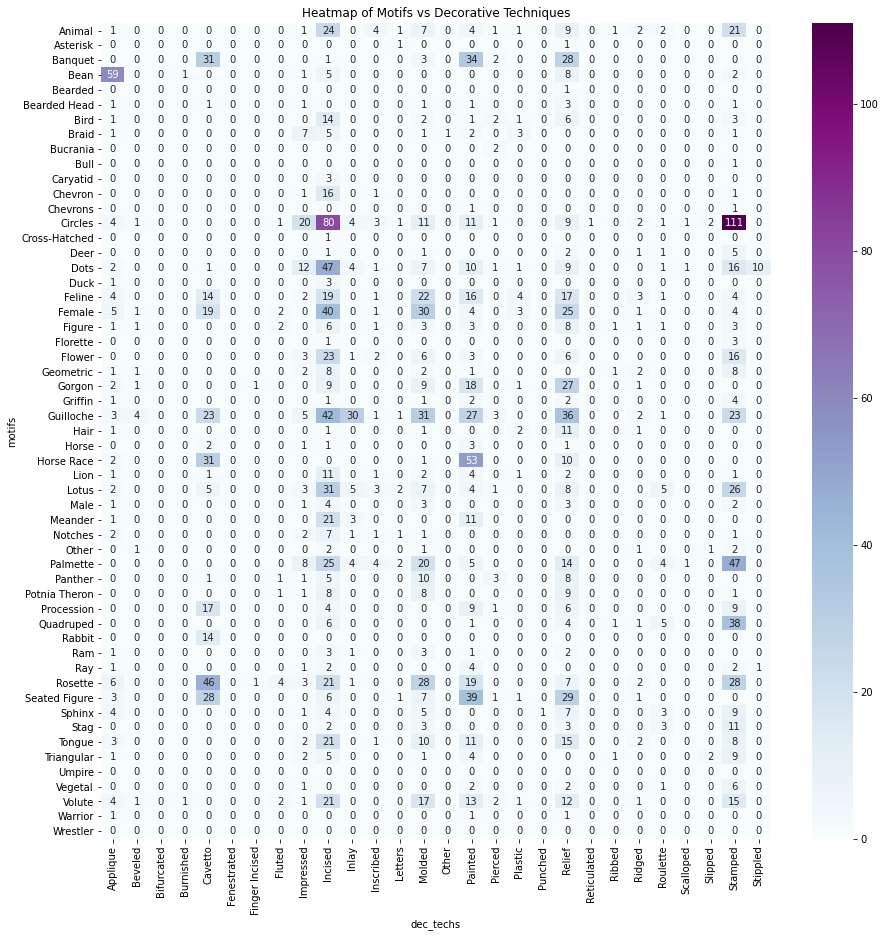

In [ ]:
fig = plt.figure(figsize=(15,15))
r = sns.heatmap(df5, cmap='BuPu', annot=True, fmt="d")
r.set_title("Heatmap of Motifs vs Decorative Techniques")

#### Co-occurence Matrix Plot 2  (motif vs motif)

Text(0.5, 1.0, 'Heatmap of Motifs vs Motifs')

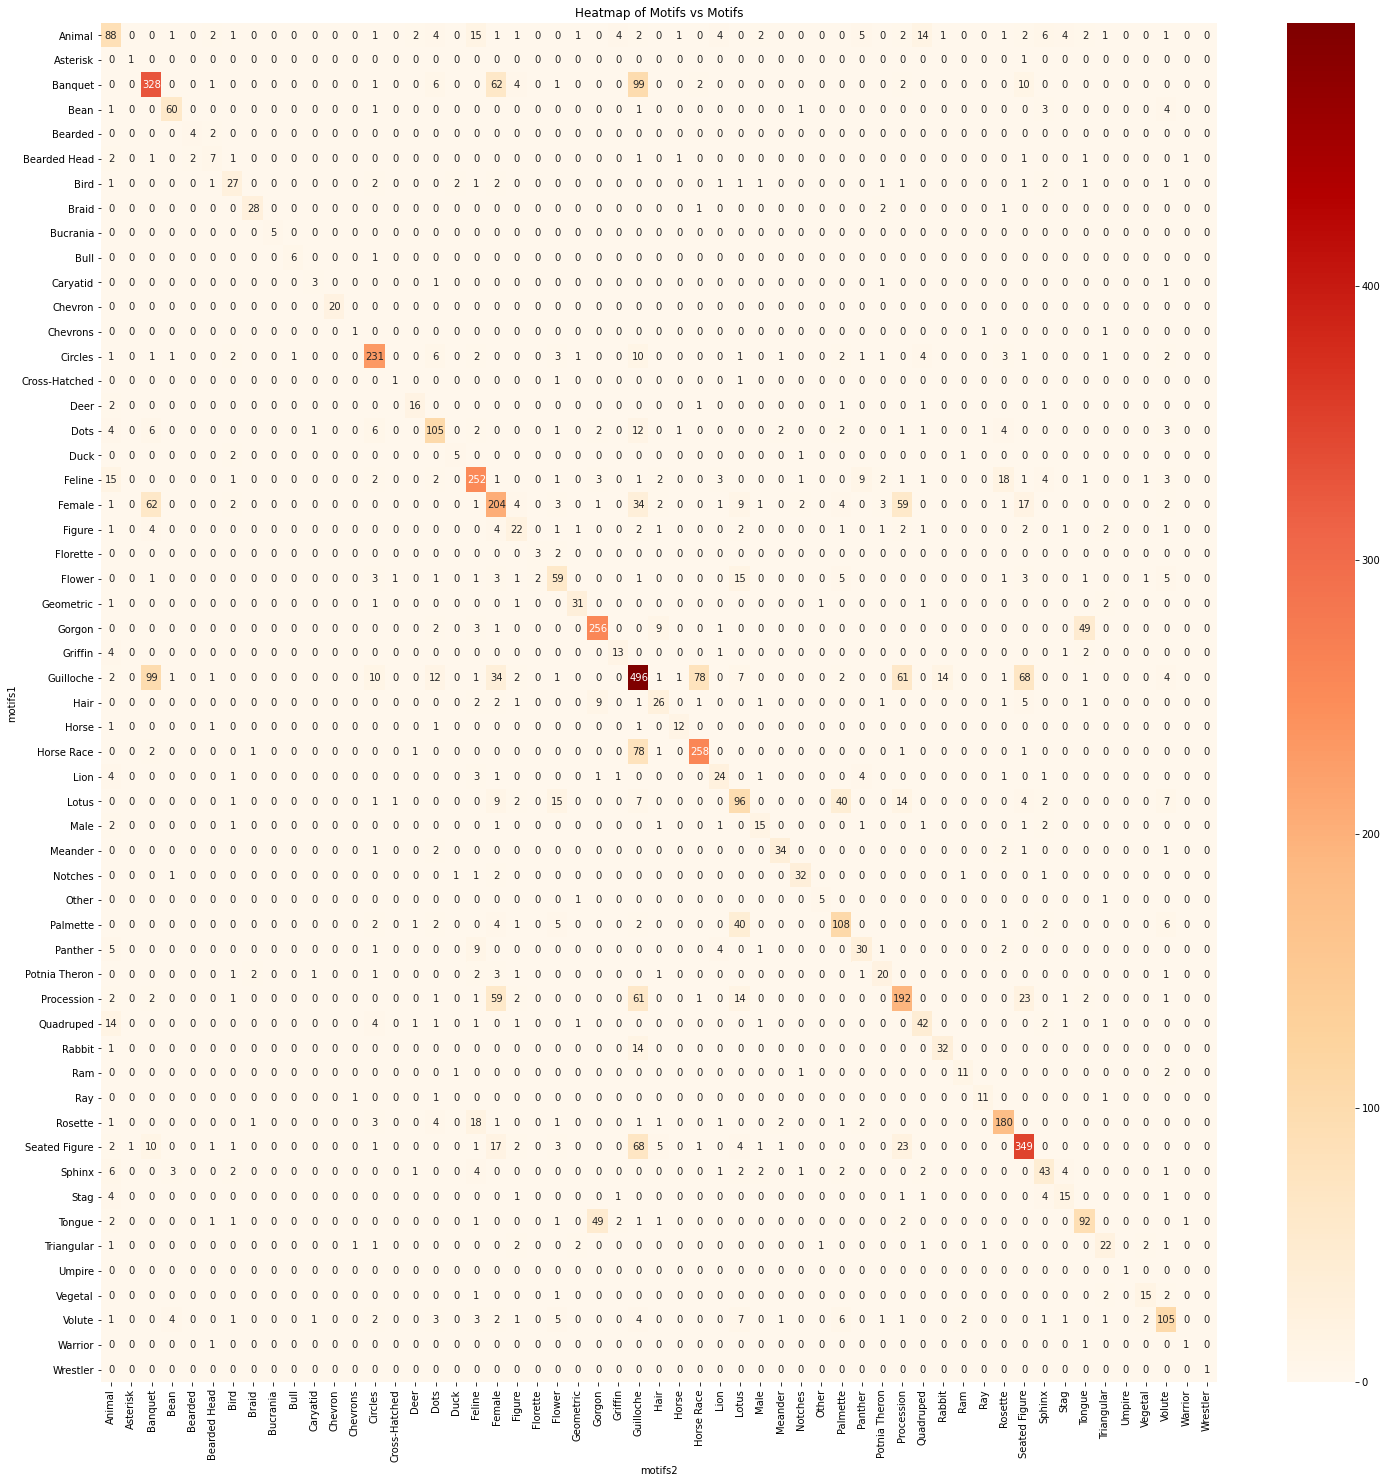

In [84]:
fig = plt.figure(figsize=(25,25))
r = sns.heatmap(df5, cmap='OrRd', annot=True, fmt="d")
r.set_title("Heatmap of Motifs vs Motifs")

#### Co-occurence Matrix Plot 2  (dec_techs vs dec_techs)

Text(0.5, 1.0, 'Heatmap of Decorative Techniques vs Decorative Techniques')

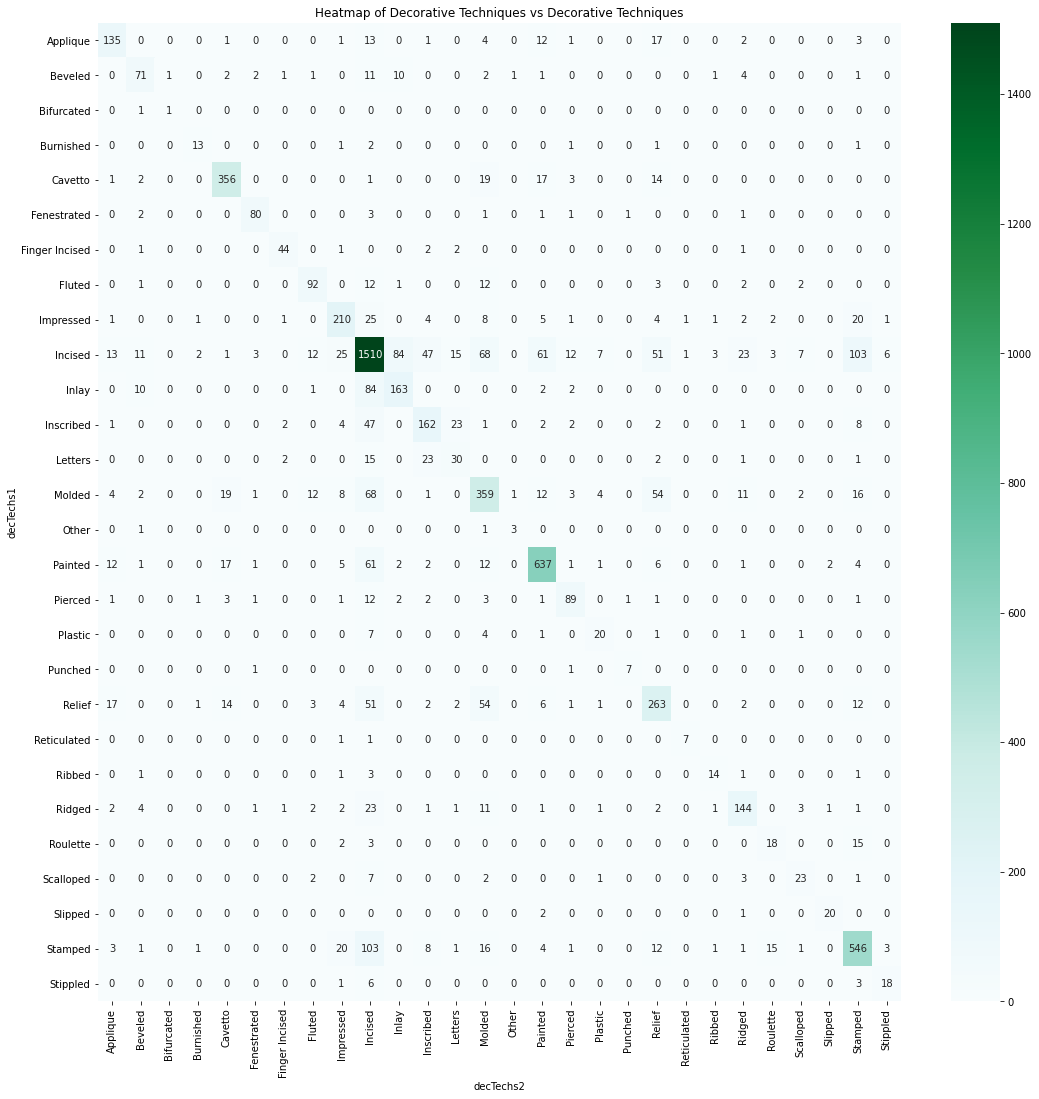

In [96]:
fig = plt.figure(figsize=(18,18))
r = sns.heatmap(df5, cmap='BuGn', annot=True, fmt="d")
r.set_title("Heatmap of Decorative Techniques vs Decorative Techniques")

#### Co-occurence Matrix Plot 3 (motif vs decorative techniques)

<Figure size 7200x21600 with 0 Axes>

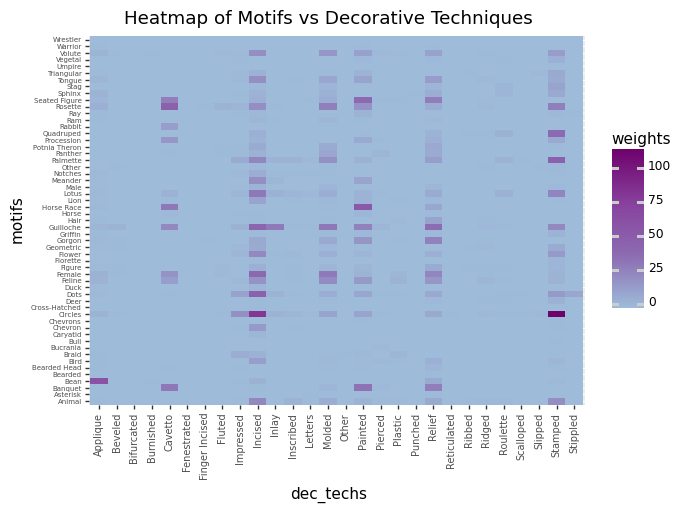

<ggplot: (-9223363251301180535)>

In [ ]:
fig = plt.figure(figsize=(100,300))

ggplot(df4, aes('dec_techs', 'motifs')) + geom_tile(aes(fill='weights'))\
        + scale_fill_gradientn(colors=['#9ebcda','#8c6bb1','#88419d','#6e016b']) \
        + ggtitle("Heatmap of Motifs vs Decorative Techniques") \
        + theme(axis_text_x  = element_text(angle = 90, hjust = 0.5, vjust =1, size=7), axis_text_y = element_text(hjust = 1, vjust = 0.5, size=5)) 

#### Co-occurence Matrix Plot 3 (motif vs motif)

<Figure size 21600x21600 with 0 Axes>

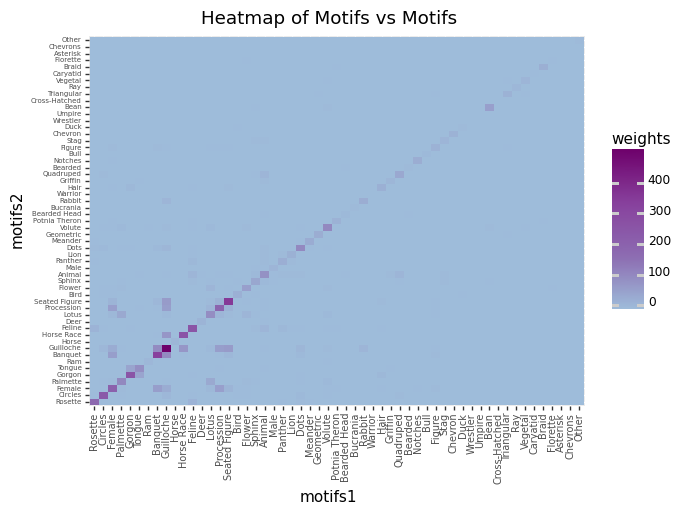

<ggplot: (8785550602167)>

In [82]:
fig = plt.figure(figsize=(300,300))

ggplot(df4, aes('motifs1', 'motifs2')) + geom_tile(aes(fill='weights'))\
        + scale_fill_gradientn(colors=['#9ebcda','#8c6bb1','#88419d','#6e016b']) \
        + ggtitle("Heatmap of Motifs vs Motifs") \
        + theme(axis_text_x  = element_text(angle = 90, hjust = 0.5, vjust =1, size=7), axis_text_y = element_text(hjust = 1, vjust = 0.5, size=5)) 

#### Co-occurence Matrix Plot 3  (dec_techs vs dec_techs)

<Figure size 21600x21600 with 0 Axes>

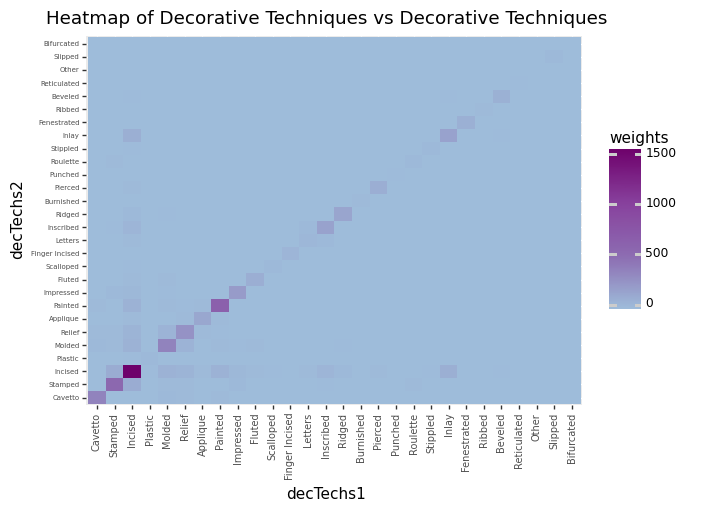

<ggplot: (8785550344817)>

In [97]:
fig = plt.figure(figsize=(300,300))

ggplot(df4, aes('decTechs1', 'decTechs2')) + geom_tile(aes(fill='weights'))\
        + scale_fill_gradientn(colors=['#9ebcda','#8c6bb1','#88419d','#6e016b']) \
        + ggtitle("Heatmap of Decorative Techniques vs Decorative Techniques") \
        + theme(axis_text_x  = element_text(angle = 90, hjust = 0.5, vjust =1, size=7), axis_text_y = element_text(hjust = 1, vjust = 0.5, size=5)) 